Running Genetic Algorithm for Car Parking Optimization...
Generation 0: Best fitness = 372.29389029088543
Generation 10: Best fitness = 314.4135717117789
Generation 20: Best fitness = 285.88692176648954
Generation 30: Best fitness = 279.1739392342255
Generation 40: Best fitness = 272.99359934672657
Generation 50: Best fitness = 256.8132594592276
Generation 60: Best fitness = 254.74219164736212
Generation 70: Best fitness = 254.7421916473621
Generation 80: Best fitness = 254.7421916473621
Converged after 85 generations!

Optimization complete!
Best fitness score: 254.7421916473621

Car parking assignments:

EV Cars (spaces):
  Car 1: Space 44 at (4, 3), distance to nearest charging station: 1.00
  Car 2: Space 79 at (7, 8), distance to nearest charging station: 1.00
  Car 3: Space 90 at (8, 9), distance to nearest charging station: 1.00
  Car 4: Space 89 at (8, 8), distance to nearest charging station: 0.00
  Car 5: Space 73 at (7, 2), distance to nearest charging station: 1.00
  Car 6:

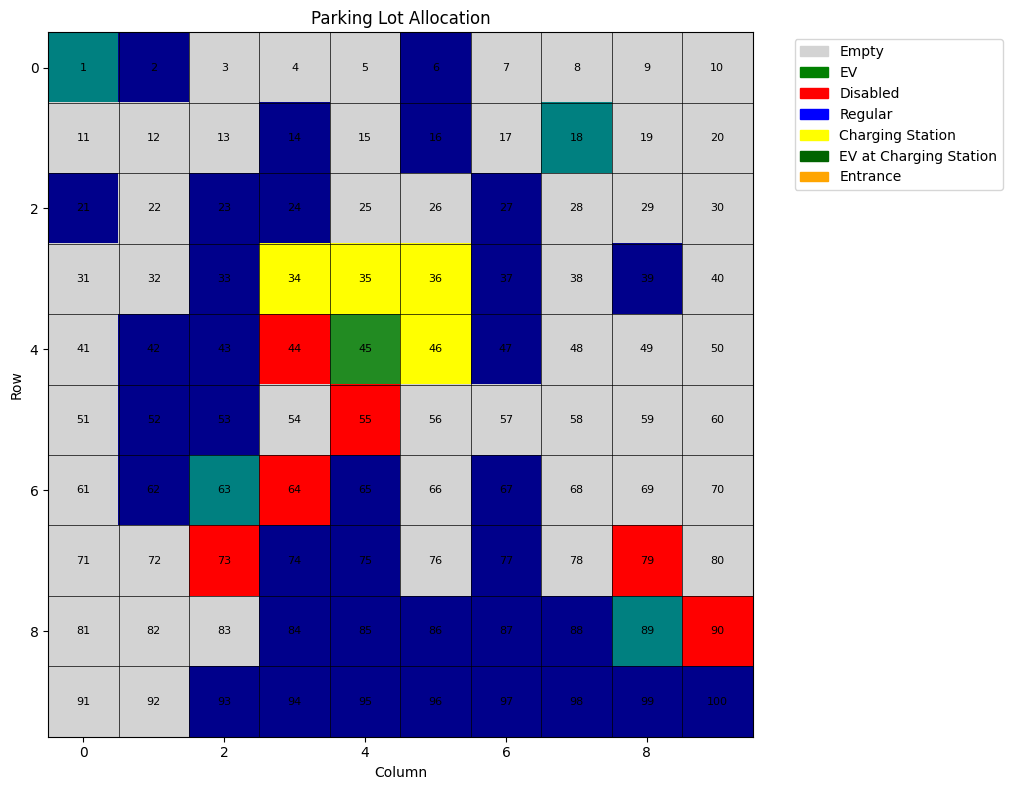

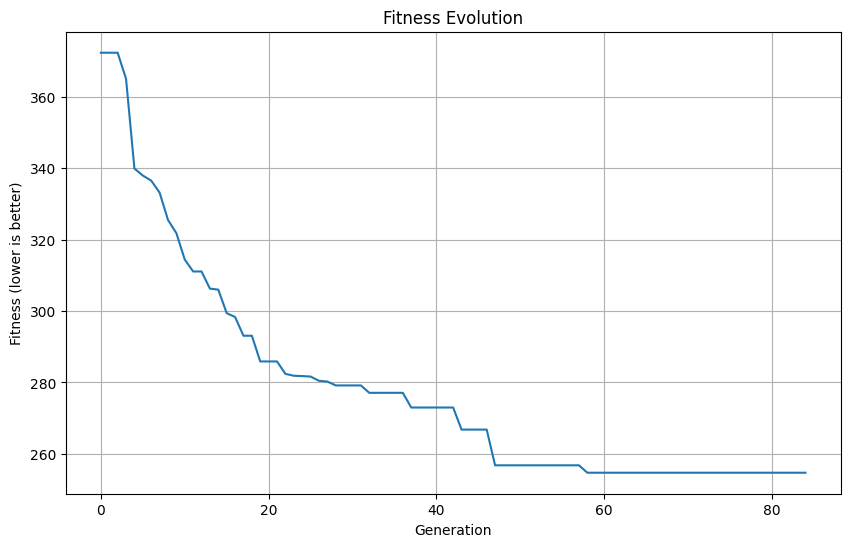

In [ ]:
#Question1
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


GRID_SIZE = 10
NUM_CARS = 50
NUM_EVS = 10
NUM_DISABLED = 5
NUM_REGULAR = 35
POPULATION_SIZE = 100
MAX_GENERATIONS = 1000
TOURNAMENT_SIZE = 5
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
CONVERGENCE_LIMIT = 20


ENTRANCE = (4, 4)  
CHARGING_STATIONS = [(0, 0), (1, 7), (4, 4), (6, 2), (8, 8)]  


def position_to_index(row, col):
    """Convert row, col position to parking space index (1-100)"""
    return row * GRID_SIZE + col + 1

def index_to_position(index):
    """Convert parking space index (1-100) to row, col position"""
    index -= 1 
    return index // GRID_SIZE, index % GRID_SIZE

# Euclidean distance
def euclidean_distance(pos1, pos2):
    """Calculate Euclidean distance between two positions"""
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)


def initialize_population(pop_size):
    """Create an initial population of random solutions"""
    population = []
    
    for _ in range(pop_size):
        
        available_spaces = list(range(1, GRID_SIZE * GRID_SIZE + 1))
       
        chromosome = random.sample(available_spaces, NUM_CARS)
        population.append(chromosome)
        
    return population

# Calculate fitness for a chromosome
def calculate_fitness(chromosome):
    """
    Calculating fitness score for a chromosome
    Lower score is better (minimization problem)
    """
    total_distance = 0
    ev_penalty = 0
    disabled_penalty = 0
    
    
    for i in range(NUM_EVS):
        car_pos = index_to_position(chromosome[i])
        
        
        min_distance = float('inf')
        for station in CHARGING_STATIONS:
            dist = euclidean_distance(car_pos, station)
            min_distance = min(min_distance, dist)
        
        ev_penalty += min_distance * 5  # Higher penalty for EVs far from charging stations
    
   
    for i in range(NUM_EVS, NUM_EVS + NUM_DISABLED):
        car_pos = index_to_position(chromosome[i])
        dist_to_entrance = euclidean_distance(car_pos, ENTRANCE)
        disabled_penalty += dist_to_entrance * 10  # Higher penalty for disabled cars far from entrance
        
    # Calculating total distance for all cars
    for i in range(NUM_CARS):
        car_pos = index_to_position(chromosome[i])
        dist_to_entrance = euclidean_distance(car_pos, ENTRANCE)
        total_distance += dist_to_entrance
    
   
    fitness = total_distance + ev_penalty + disabled_penalty
    
    return fitness

# Tournament selection
def tournament_selection(population, fitness_scores):
    """Select a parent using tournament selection"""
    tournament_indices = random.sample(range(len(population)), TOURNAMENT_SIZE)
    tournament_fitness = [fitness_scores[i] for i in tournament_indices]
    
    # Selecting the best individual from the tournament (lowest fitness score)
    winner_index = tournament_indices[tournament_fitness.index(min(tournament_fitness))]
    return population[winner_index]


def uniform_crossover(parent1, parent2):
    """Perform uniform crossover between two parents"""
    if random.random() > CROSSOVER_RATE:
        return parent1.copy()
    
    
    child = [-1] * NUM_CARS
    
   
    mask = [random.choice([True, False]) for _ in range(NUM_CARS)]
    
    
    for i in range(NUM_CARS):
        if mask[i]:
            child[i] = parent1[i]
        else:
            child[i] = parent2[i]
    
   
    used_spaces = set()
    for i in range(NUM_CARS):
        if child[i] != -1:
            used_spaces.add(child[i])
    
    available_spaces = [space for space in range(1, GRID_SIZE * GRID_SIZE + 1) if space not in used_spaces]
    
   
    for i in range(NUM_CARS):
        if child[i] == -1 or child.count(child[i]) > 1:
            
            if child[i] != -1 and child.index(child[i]) != i:
                if available_spaces:
                    child[i] = available_spaces.pop()
            else:
                if available_spaces:
                    child[i] = available_spaces.pop()
    
    return child


def swap_mutation(chromosome):
    """Perform swap mutation on a chromosome"""
    if random.random() > MUTATION_RATE:
        return chromosome
    
    
    mutated = chromosome.copy()
    
   
    pos1, pos2 = random.sample(range(NUM_CARS), 2)
    mutated[pos1], mutated[pos2] = mutated[pos2], mutated[pos1]
    
    return mutated

# Main genetic algorithm
def genetic_algorithm():
    """Main genetic algorithm loop"""
   
    population = initialize_population(POPULATION_SIZE)
    
  
    best_solution = None
    best_fitness = float('inf')
    generations_without_improvement = 0
    
  
    fitness_history = []
    
    # Evolution loop
    for generation in range(MAX_GENERATIONS):
       
        fitness_scores = [calculate_fitness(chromosome) for chromosome in population]
        
        
        gen_best_index = fitness_scores.index(min(fitness_scores))
        gen_best_fitness = fitness_scores[gen_best_index]
        gen_best_solution = population[gen_best_index]
        
        
        if gen_best_fitness < best_fitness:
            best_fitness = gen_best_fitness
            best_solution = gen_best_solution
            generations_without_improvement = 0
        else:
            generations_without_improvement += 1
        
        
        fitness_history.append(best_fitness)
        
       
        if generations_without_improvement >= CONVERGENCE_LIMIT:
            print(f"Converged after {generation + 1} generations!")
            break
            
        # Status update
        if generation % 10 == 0:
            print(f"Generation {generation}: Best fitness = {best_fitness}")
        
        
        new_population = []
        
        # Elitism: Keeping the best solution
        new_population.append(gen_best_solution)
        
        
        while len(new_population) < POPULATION_SIZE:
            #  parents
            parent1 = tournament_selection(population, fitness_scores)
            parent2 = tournament_selection(population, fitness_scores)
            
            # offspring
            child = uniform_crossover(parent1, parent2)
            child = swap_mutation(child)
            
            # Adding to new population
            new_population.append(child)
        
        # Replacing old population
        population = new_population
    
    return best_solution, best_fitness, fitness_history


def visualize_solution(solution):
    """Visualize the parking lot allocation"""
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    
    
    for i, space in enumerate(solution):
        row, col = index_to_position(space)
        if i < NUM_EVS:
            grid[row][col] = 1  # EV
        elif i < NUM_EVS + NUM_DISABLED:
            grid[row][col] = 2  # Disabled
        else:
            grid[row][col] = 3  # Regular
    
    
    for station in CHARGING_STATIONS:
        if grid[station[0]][station[1]] == 0:
            grid[station[0]][station[1]] = 4  # Empty charging station
        elif grid[station[0]][station[1]] == 1:
            grid[station[0]][station[1]] = 5  # EV at charging station
        elif grid[station[0]][station[1]] == 2:
            grid[station[0]][station[1]] = 6  # Disabled at charging station
        elif grid[station[0]][station[1]] == 3:
            grid[station[0]][station[1]] = 7  # Regular car at charging station
    
    
    entrance_row, entrance_col = ENTRANCE
    if grid[entrance_row][entrance_col] == 0:
        grid[entrance_row][entrance_col] = 8  # Empty entrance
    elif grid[entrance_row][entrance_col] == 1:
        grid[entrance_row][entrance_col] = 9  # EV at entrance
    elif grid[entrance_row][entrance_col] == 2:
        grid[entrance_row][entrance_col] = 10  # Disabled at entrance
    elif grid[entrance_row][entrance_col] == 3:
        grid[entrance_row][entrance_col] = 11  # Regular car at entrance
    elif grid[entrance_row][entrance_col] == 4:
        grid[entrance_row][entrance_col] = 12  # Entrance and charging station (empty)
    elif grid[entrance_row][entrance_col] == 5:
        grid[entrance_row][entrance_col] = 13  # Entrance and charging station (EV)
    
    
    colors = ['lightgray', 'green', 'red', 'blue', 'yellow', 'darkgreen', 'darkred', 'darkblue', 
             'orange', 'lime', 'maroon', 'teal', 'gold', 'forestgreen']
    cmap = ListedColormap(colors)
    
    
    plt.figure(figsize=(10, 8))
    plt.imshow(grid, cmap=cmap)
    
   
    for i in range(GRID_SIZE + 1):
        plt.axhline(i - 0.5, color='black', linewidth=0.5)
        plt.axvline(i - 0.5, color='black', linewidth=0.5)
    
    
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            plt.text(j, i, str(position_to_index(i, j)), color='black', ha='center', va='center', fontsize=8)
    
    
    legend_elements = [
        mpatches.Patch(color='lightgray', label='Empty'),
        mpatches.Patch(color='green', label='EV'),
        mpatches.Patch(color='red', label='Disabled'),
        mpatches.Patch(color='blue', label='Regular'),
        mpatches.Patch(color='yellow', label='Charging Station'),
        mpatches.Patch(color='darkgreen', label='EV at Charging Station'),
        mpatches.Patch(color='orange', label='Entrance'),
    ]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.title('Parking Lot Allocation')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_history)
    plt.title('Fitness Evolution')
    plt.xlabel('Generation')
    plt.ylabel('Fitness (lower is better)')
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    print("Running Genetic Algorithm for Car Parking Optimization...")
    best_solution, best_fitness, fitness_history = genetic_algorithm()
    
    print("\nOptimization complete!")
    print(f"Best fitness score: {best_fitness}")
    print("\nCar parking assignments:")
    
    print("\nEV Cars (spaces):")
    for i in range(NUM_EVS):
        parking_space = best_solution[i]
        position = index_to_position(parking_space)
        nearest_station = min(CHARGING_STATIONS, key=lambda station: euclidean_distance(position, station))
        dist_to_station = euclidean_distance(position, nearest_station)
        print(f"  Car {i+1}: Space {parking_space} at {position}, distance to nearest charging station: {dist_to_station:.2f}")
    
    print("\nDisabled Cars (spaces):")
    for i in range(NUM_EVS, NUM_EVS + NUM_DISABLED):
        parking_space = best_solution[i]
        position = index_to_position(parking_space)
        dist_to_entrance = euclidean_distance(position, ENTRANCE)
        print(f"  Car {i+1}: Space {parking_space} at {position}, distance to entrance: {dist_to_entrance:.2f}")
    
    print("\nRegular Cars (spaces):")
    for i in range(NUM_EVS + NUM_DISABLED, NUM_CARS):
        parking_space = best_solution[i]
        position = index_to_position(parking_space)
        dist_to_entrance = euclidean_distance(position, ENTRANCE)
        print(f"  Car {i+1}: Space {parking_space} at {position}, distance to entrance: {dist_to_entrance:.2f}")
    
    # Calculating total walking distance
    total_distance = 0
    for i in range(NUM_CARS):
        car_pos = index_to_position(best_solution[i])
        dist_to_entrance = euclidean_distance(car_pos, ENTRANCE)
        total_distance += dist_to_entrance
    
    print(f"\nTotal walking distance: {total_distance:.2f}")
    
    
    visualize_solution(best_solution)

In [ ]:
#QUESTON2
import numpy as np
import random
from collections import Counter


strategies = {
    'S1': {'name': 'Safe Bonds', 'return': 0.5, 'risk': 1, 'drawdown': -1},
    'S2': {'name': 'Index Funds', 'return': 1.2, 'risk': 2, 'drawdown': -2.5},
    'S3': {'name': 'Blue-Chip Stocks', 'return': 2.5, 'risk': 3, 'drawdown': -5},
    'S4': {'name': 'Growth Stocks', 'return': 5.0, 'risk': 4, 'drawdown': -10},
    'S5': {'name': 'Cryptocurrency Trading', 'return': 10.0, 'risk': 5, 'drawdown': -15}
}

# GA parameters
POPULATION_SIZE = 100
GENERATIONS = 100
CHROMOSOME_LENGTH = 30
TOURNAMENT_SIZE = 5
MUTATION_RATE = 0.05
CROSSOVER_RATE = 0.8

def create_individual():
    """Create a random chromosome representing a 30-day trading strategy sequence"""
    
    chromosome = [random.choice(list(strategies.keys()))]
    
    
    for _ in range(CHROMOSOME_LENGTH - 1):
        available_strategies = [s for s in strategies.keys() if s != chromosome[-1]]
        chromosome.append(random.choice(available_strategies))
    
    return chromosome

def initialize_population(size):
    """Create initial population of random chromosomes"""
    return [create_individual() for _ in range(size)]

def calculate_fitness(chromosome):
    """Calculate fitness based on returns and penalties"""
    total_return = 0
    daily_drawdowns = []
    consecutive_penalties = 0
    
    
    for i in range(len(chromosome)):
        strategy = chromosome[i]
        total_return += strategies[strategy]['return']
        daily_drawdowns.append(strategies[strategy]['drawdown'])
        
       
        if i > 0 and chromosome[i] == chromosome[i-1]:
            consecutive_penalties += 1
    
   
    penalty_drawdown_daily = 0
    penalty_drawdown_cumulative = 0
    penalty_consecutive = 5 * consecutive_penalties
    
    # Checking for daily drawdown exceeding -15%
    if min(daily_drawdowns) < -15:
        penalty_drawdown_daily = 10
    
    
    cumulative_drawdown = sum(daily_drawdowns)
    if cumulative_drawdown < -30:
        # Increased penalty with scaling: base penalty plus additional penalty 
        # proportional to how much the constraint is violated
        excess_drawdown = abs(cumulative_drawdown) - 30
        penalty_drawdown_cumulative = 20 + (excess_drawdown * 2)
    
    
    fitness = total_return - penalty_drawdown_daily - penalty_drawdown_cumulative - penalty_consecutive
    
    return fitness, total_return, penalty_drawdown_daily, penalty_drawdown_cumulative, penalty_consecutive, cumulative_drawdown

def tournament_selection(population, fitnesses):
    """Select parents using tournament selection"""
    tournament_indices = random.sample(range(len(population)), min(TOURNAMENT_SIZE, len(population)))
    tournament = [(population[i], fitnesses[i]) for i in tournament_indices]
    return max(tournament, key=lambda x: x[1][0])[0]

def crossover(parent1, parent2):
    """Perform single-point crossover"""
    if random.random() > CROSSOVER_RATE:
        return parent1
    
    crossover_point = random.randint(1, CHROMOSOME_LENGTH - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    
   
    if crossover_point > 0 and child[crossover_point-1] == child[crossover_point]:
        available_strategies = [s for s in strategies.keys() if s != child[crossover_point-1]]
        child[crossover_point] = random.choice(available_strategies)
    
    
    for i in range(1, len(child)):
        if child[i] == child[i-1]:
            available_strategies = [s for s in strategies.keys() if s != child[i-1]]
            child[i] = random.choice(available_strategies)
    
    return child

def mutate(chromosome):
    """Perform mutation on the chromosome"""
    mutated = chromosome.copy()
    
    for i in range(len(mutated)):
        if random.random() < MUTATION_RATE:
            
            available_strategies = list(strategies.keys())
            if i > 0:
                available_strategies = [s for s in available_strategies if s != mutated[i-1]]
            if i < len(mutated) - 1:
                available_strategies = [s for s in available_strategies if s != mutated[i+1]]
            
           
            if available_strategies:
                mutated[i] = random.choice(available_strategies)
    
    return mutated

def genetic_algorithm():
    """Main genetic algorithm loop"""
    
    population = initialize_population(POPULATION_SIZE)
    
    
    best_chromosome = population[0]  
    best_fitness = float('-inf')
    best_total_return = 0
    best_cumulative_drawdown = 0
    history = []
    
    for generation in range(GENERATIONS):
        # Calculating fitness for each chromosome
        fitness_results = [calculate_fitness(chromosome) for chromosome in population]
        
        
        valid_solutions = [(i, result) for i, result in enumerate(fitness_results) 
                          if result[5] >= -30]
        
       
        if valid_solutions:
            
            current_best_idx = max(valid_solutions, key=lambda x: x[1][0])[0]
        else:
           
            current_best_idx = max(range(len(fitness_results)), key=lambda i: fitness_results[i][0])
        
        current_best_chromosome = population[current_best_idx]
        current_best_fitness = fitness_results[current_best_idx]
        current_cumulative_drawdown = fitness_results[current_best_idx][5]
        
       
        if (current_best_fitness[0] > best_fitness and 
            (current_cumulative_drawdown >= -30 or best_cumulative_drawdown < -30)):
            best_chromosome = current_best_chromosome
            best_fitness = current_best_fitness[0]
            best_total_return = current_best_fitness[1]
            best_cumulative_drawdown = current_cumulative_drawdown
        
        
        history.append((generation, current_best_fitness[0], current_best_fitness[1], current_cumulative_drawdown))
        
        
        if generation % 10 == 0:
            print(f"Generation {generation}: Best fitness = {current_best_fitness[0]:.2f}, "
                  f"Return = {current_best_fitness[1]:.2f}%, "
                  f"Drawdown = {current_cumulative_drawdown:.2f}%")
        
        # Create new population through selection, crossover, and mutation
        new_population = []
        
        # Elitism: Keeping the best 10% of chromosomes
        elite_size = max(1, POPULATION_SIZE // 10)  
        
        
        valid_indices = [i for i, result in enumerate(fitness_results) if result[5] >= -30]
        
        if valid_indices:
            
            valid_indices_sorted = sorted(valid_indices, 
                                  key=lambda i: fitness_results[i][0], 
                                  reverse=True)
            
            # Take up to elite_size elites from valid solutions
            elite_valid_indices = valid_indices_sorted[:min(elite_size, len(valid_indices_sorted))]
            elites = [population[i] for i in elite_valid_indices]
            new_population.extend(elites)
        
        # If we need more elites, get them from the general population
        if len(new_population) < elite_size:
            
            remaining = elite_size - len(new_population)
            
            
            all_indices_sorted = sorted(range(len(fitness_results)), 
                                  key=lambda i: fitness_results[i][0], 
                                  reverse=True)
            
           
            remaining_indices = [i for i in all_indices_sorted if i not in (valid_indices if valid_indices else [])]
            
           
            remaining_elites = [population[i] for i in remaining_indices[:remaining]]
            new_population.extend(remaining_elites)
        
        
        while len(new_population) < POPULATION_SIZE:
            # Tournament selection
            parent1 = tournament_selection(population, fitness_results)
            parent2 = tournament_selection(population, fitness_results)
            
            # Crossover
            child = crossover(parent1, parent2)
            
            # Mutation
            child = mutate(child)
            
            new_population.append(child)
        
        # Replaceing old population
        population = new_population
    
    # Final evaluation of the best chromosome
    final_fitness, final_return, penalty_daily, penalty_cumulative, penalty_consecutive, cumulative_drawdown = calculate_fitness(best_chromosome)
    
    return best_chromosome, final_fitness, final_return, penalty_daily, penalty_cumulative, penalty_consecutive, cumulative_drawdown

def analyze_strategy(chromosome):
    """Analyze the given trading strategy"""
    strategy_count = Counter(chromosome)
    daily_returns = [strategies[s]['return'] for s in chromosome]
    daily_drawdowns = [strategies[s]['drawdown'] for s in chromosome]
    risk_levels = [strategies[s]['risk'] for s in chromosome]
    
    
    avg_daily_return = np.mean(daily_returns)
    avg_risk = np.mean(risk_levels)
    worst_drawdown = min(daily_drawdowns)
    cumulative_drawdown = sum(daily_drawdowns)
    
    print("\n===== Strategy Analysis =====")
    print(f"Total Return: {sum(daily_returns):.2f}%")
    print(f"Average Daily Return: {avg_daily_return:.2f}%")
    print(f"Average Risk Level: {avg_risk:.2f}")
    print(f"Worst Single-Day Drawdown: {worst_drawdown:.2f}%")
    print(f"Cumulative Drawdown: {cumulative_drawdown:.2f}%")
    print("\nStrategy Frequency:")
    for strategy, count in strategy_count.items():
        print(f"  {strategy} ({strategies[strategy]['name']}): {count} days")

def main():
    print("Running Genetic Algorithm for Trading Bot Strategy Optimization...")
    print("Parameters:")
    print(f"Population Size: {POPULATION_SIZE}")
    print(f"Generations: {GENERATIONS}")
    print(f"Chromosome Length (Days): {CHROMOSOME_LENGTH}")
    print(f"Tournament Size: {TOURNAMENT_SIZE}")
    print(f"Mutation Rate: {MUTATION_RATE}")
    print(f"Crossover Rate: {CROSSOVER_RATE}")
    
    
    best_chromosome, fitness, total_return, penalty_daily, penalty_cumulative, penalty_consecutive, cumulative_drawdown = genetic_algorithm()
    
    
    print("\n===== Best Trading Strategy =====")
    print("Day: Strategy (Name)")
    for i, strategy in enumerate(best_chromosome):
        print(f"Day {i+1}: {strategy} ({strategies[strategy]['name']})")
    
    print("\n===== Fitness Breakdown =====")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Daily Drawdown Penalty: {penalty_daily:.2f}%")
    print(f"Cumulative Drawdown Penalty: {penalty_cumulative:.2f}%")
    print(f"Consecutive Strategies Penalty: {penalty_consecutive:.2f}%")
    print(f"Final Fitness: {fitness:.2f}")
    print(f"Cumulative Drawdown: {cumulative_drawdown:.2f}%")
    
    
    analyze_strategy(best_chromosome)

if __name__ == "__main__":
    main()

Running Genetic Algorithm for Trading Bot Strategy Optimization...
Parameters:
Population Size: 100
Generations: 100
Chromosome Length (Days): 30
Tournament Size: 5
Mutation Rate: 0.05
Crossover Rate: 0.8
Generation 0: Best fitness = -149.40, Return = 72.60%, Drawdown = -131.00%
Generation 10: Best fitness = -78.30, Return = 38.70%, Drawdown = -78.50%
Generation 20: Best fitness = -55.20, Return = 30.80%, Drawdown = -63.00%
Generation 30: Best fitness = -49.20, Return = 28.80%, Drawdown = -59.00%
Generation 40: Best fitness = -49.20, Return = 28.80%, Drawdown = -59.00%
Generation 50: Best fitness = -49.20, Return = 28.80%, Drawdown = -59.00%
Generation 60: Best fitness = -49.20, Return = 28.80%, Drawdown = -59.00%
Generation 70: Best fitness = -49.20, Return = 28.80%, Drawdown = -59.00%
Generation 80: Best fitness = -49.20, Return = 28.80%, Drawdown = -59.00%
Generation 90: Best fitness = -49.20, Return = 28.80%, Drawdown = -59.00%

===== Best Trading Strategy =====
Day: Strategy (Name

In [ ]:
#QUESTION3
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy

# Constants
ROWS = 3
COLS = 50
MAX_STEPS = 70
MAFIA_DENSITY = 0.3
POPULATION_SIZE = 100
GENERATIONS = 200
ELITE_SIZE = 10
TOURNAMENT_SIZE = 5
MUTATION_RATE_MIN = 0.05
MUTATION_RATE_MAX = 0.25

# Actions
FORWARD = 0      # Move one step right
BACKWARD = 1     # Move one step left
JUMP = 2         # Move one step up
STEP_DOWN = 3    # Move one step down
SUPER_JUMP = 4   # Move two steps up
DASH = 5         # Move two steps right


ACTION_MAP = {
    FORWARD: [0, 1],
    BACKWARD: [0, -1],
    JUMP: [-1, 0],
    STEP_DOWN: [1, 0],
    SUPER_JUMP: [-2, 0],
    DASH: [0, 2]
}

def create_grid():
    """Create a 3x50 grid with 30% mafia-controlled blocks"""
    grid = np.zeros((ROWS, COLS), dtype=int)
    
   
    total_blocks = ROWS * COLS
    mafia_blocks = int(total_blocks * MAFIA_DENSITY)
    
    #  starting position (bottom-left) and exit (top-right) 
    start_pos = (ROWS-1, 0)
    exit_pos = (0, COLS-1)
    
    # Randomly place mafia members
    mafia_placed = 0
    while mafia_placed < mafia_blocks:
        row = random.randint(0, ROWS-1)
        col = random.randint(0, COLS-1)
        
        
        if (row, col) != start_pos and (row, col) != exit_pos and grid[row, col] == 0:
            grid[row, col] = 1  # 1 represents a mafia block
            mafia_placed += 1
    
    return grid, start_pos, exit_pos

def create_individual():
    """Creating a random sequence of actions (chromosome)"""
    return [random.randint(0, 5) for _ in range(MAX_STEPS)]

def initialize_population():
    """Initializing a population of chromosomes"""
    return [create_individual() for _ in range(POPULATION_SIZE)]

def is_valid_position(grid, position):
    """Checking if a position is valid (within grid and not a mafia block)"""
    row, col = position
    
    # Checking if position is within grid bounds
    if row < 0 or row >= ROWS or col < 0 or col >= COLS:
        return False
    
    
    if grid[row, col] == 1:
        return False
    
    return True

def evaluate_individual(grid, chromosome, start_pos, exit_pos):
    
    position = start_pos
    steps_taken = 0
    path = [position]
    
   
    for action in chromosome:
        
        row_delta, col_delta = ACTION_MAP[action]
        
        
        new_row = position[0] + row_delta
        new_col = position[1] + col_delta
        new_position = (new_row, new_col)
        
        
        if is_valid_position(grid, new_position):
            position = new_position
            path.append(position)
            steps_taken += 1
            
           
            if position == exit_pos:
                break
        else:
            
            steps_taken += 1
    
    # Calculating distance from exit (Manhattan distance)
    distance_from_exit = abs(position[0] - exit_pos[0]) + abs(position[1] - exit_pos[1])
    
   
    reached_exit = position == exit_pos
    
    if reached_exit:
        
        fitness = 1000 + (MAX_STEPS - steps_taken) * 10
    else:
        
        max_distance = ROWS + COLS
        distance_score = (max_distance - distance_from_exit) / max_distance * 500
        
        
        step_penalty = (steps_taken / MAX_STEPS) * 50
        
        fitness = distance_score - step_penalty
    
    return reached_exit, steps_taken, distance_from_exit, fitness, path

def tournament_selection(population, fitnesses):
    """Select an individual using tournament selection"""
    tournament_indices = random.sample(range(len(population)), TOURNAMENT_SIZE)
    tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
    winner_idx = tournament_indices[tournament_fitnesses.index(max(tournament_fitnesses))]
    return population[winner_idx]

def crossover(parent1, parent2):
    """Perform one-point crossover between parents"""
    if len(parent1) != len(parent2):
        raise ValueError("Parents must have the same length")
    
    crossover_point = random.randint(1, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    
    return child

def mutate(chromosome):
    """Mutate a chromosome with a variable mutation rate"""
    # variable mutation rate between 5% and 25%
    mutation_rate = random.uniform(MUTATION_RATE_MIN, MUTATION_RATE_MAX)
    
    mutated = deepcopy(chromosome)
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = random.randint(0, 5)  # Random action
    
    return mutated

def run_genetic_algorithm():
    """Run the genetic algorithm to find an optimal escape path"""
    
    grid, start_pos, exit_pos = create_grid()
    
    # Initializing population
    population = initialize_population()
    
    
    best_individual = None
    best_fitness = float('-inf')
    best_path = None
    best_steps = MAX_STEPS
    best_reached_exit = False
    
    
    generation_stats = {
        'max_fitness': [],
        'avg_fitness': [],
        'success_count': []
    }
    
   
    for generation in range(GENERATIONS):
        
        fitness_results = []
        all_reached_exit = []
        all_steps = []
        all_paths = []
        
        for individual in population:
            reached_exit, steps, distance, fitness, path = evaluate_individual(
                grid, individual, start_pos, exit_pos
            )
            fitness_results.append(fitness)
            all_reached_exit.append(reached_exit)
            all_steps.append(steps)
            all_paths.append(path)
            
            # Updating best individual if better
            if fitness > best_fitness:
                best_individual = individual
                best_fitness = fitness
                best_path = path
                best_steps = steps
                best_reached_exit = reached_exit
        
       
        generation_stats['max_fitness'].append(max(fitness_results))
        generation_stats['avg_fitness'].append(sum(fitness_results) / len(fitness_results))
        generation_stats['success_count'].append(sum(all_reached_exit))
        
        
        success_count = sum(all_reached_exit)
        print(f"Generation {generation}: " 
              f"Best Fitness = {max(fitness_results):.2f}, "
              f"Avg Fitness = {sum(fitness_results) / len(fitness_results):.2f}, "
              f"Success Count = {success_count}")
        
       
        if success_count > 0:
            best_success_idx = all_reached_exit.index(True)
            best_success_steps = all_steps[best_success_idx]
            print(f"  Best Successful Escape: {best_success_steps} steps")
        
        # Checking termination condition: either reached max generations or found a perfect solution
        if generation == GENERATIONS - 1 or (best_reached_exit and best_steps < MAX_STEPS // 2):
            break
        
        # Creating new generation
        new_population = []
        
        # Elitism - keeping best individuals
        sorted_indices = sorted(range(len(fitness_results)), 
                                key=lambda i: fitness_results[i], 
                                reverse=True)
        elites = [population[i] for i in sorted_indices[:ELITE_SIZE]]
        new_population.extend(elites)
        
        #  remaining individuals through selection, crossover, and mutation
        while len(new_population) < POPULATION_SIZE:
            # Selection
            parent1 = tournament_selection(population, fitness_results)
            parent2 = tournament_selection(population, fitness_results)
            
            # Crossover
            child = crossover(parent1, parent2)
            
            # Mutation
            child = mutate(child)
            
            new_population.append(child)
        
        # Replacing old population
        population = new_population
    
    # best solution and statistics
    return grid, best_individual, best_path, best_steps, best_reached_exit, best_fitness, generation_stats

def visualize_grid_and_path(grid, path, start_pos, exit_pos):
    """Visualize the grid and the escape path"""
    plt.figure(figsize=(15, 4))
    
   
    plt.imshow(grid, cmap='binary', interpolation='nearest')
    
    
    plt.plot(start_pos[1], start_pos[0], 'go', markersize=10, label='Start')
    plt.plot(exit_pos[1], exit_pos[0], 'ro', markersize=10, label='Exit')
    
    
    if path:
        path_y, path_x = zip(*[(p[0], p[1]) for p in path])
        plt.plot(path_x, path_y, 'b-', linewidth=2, label='Escape Path')
    
    plt.grid(True)
    plt.title('Escape from Mafia Stronghold')
    plt.legend()
    plt.tight_layout()
    plt.show()

def visualize_progress(generation_stats):
    """Visualize the progress of the genetic algorithm"""
    plt.figure(figsize=(15, 8))
    
    
    plt.subplot(2, 1, 1)
    plt.plot(generation_stats['max_fitness'], 'r-', label='Max Fitness')
    plt.plot(generation_stats['avg_fitness'], 'b-', label='Avg Fitness')
    plt.title('Fitness Progression')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True)
    
   
    plt.subplot(2, 1, 2)
    plt.plot(generation_stats['success_count'], 'g-', label='Successful Escapes')
    plt.title('Successful Escapes per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def print_solution_summary(best_individual, best_steps, best_reached_exit, best_fitness):
    """Print a summary of the best solution found"""
    print("\n===== SOLUTION SUMMARY =====")
    print(f"Exit Reached: {best_reached_exit}")
    print(f"Steps Taken: {best_steps}")
    print(f"Fitness Score: {best_fitness:.2f}")
    
    if best_reached_exit:
        efficiency = (best_steps / MAX_STEPS) * 100
        print(f"Efficiency: Used {efficiency:.1f}% of available steps")
    
    
    action_names = ["FORWARD", "BACKWARD", "JUMP", "STEP_DOWN", "SUPER_JUMP", "DASH"]
    
    

def main():
    print("Genetic Algorithm for Mafia Stronghold Escape Problem")
    print(f"Grid Size: {ROWS}x{COLS}")
    print(f"Mafia Density: {MAFIA_DENSITY * 100}%")
    print(f"Maximum Steps: {MAX_STEPS}")
    print(f"Population Size: {POPULATION_SIZE}")
    print(f"Number of Generations: {GENERATIONS}")
    print(f"Mutation Rate Range: {MUTATION_RATE_MIN * 100}% - {MUTATION_RATE_MAX * 100}%")
    print("\nRunning genetic algorithm...\n")
    
    
    grid, best_individual, best_path, best_steps, best_reached_exit, best_fitness, generation_stats = run_genetic_algorithm()
    
    
    start_pos = (ROWS-1, 0)
    exit_pos = (0, COLS-1)
    
    
    print_solution_summary(best_individual, best_steps, best_reached_exit, best_fitness)
    
    

if __name__ == "__main__":
    main()

Genetic Algorithm for Mafia Stronghold Escape Problem
Grid Size: 3x50
Mafia Density: 30.0%
Maximum Steps: 70
Population Size: 100
Number of Generations: 200
Mutation Rate Range: 5.0% - 25.0%

Running genetic algorithm...

Generation 0: Best Fitness = 242.45, Avg Fitness = 118.21, Success Count = 0
Generation 1: Best Fitness = 261.32, Avg Fitness = 150.85, Success Count = 0
Generation 2: Best Fitness = 280.19, Avg Fitness = 183.40, Success Count = 0
Generation 3: Best Fitness = 327.36, Avg Fitness = 201.23, Success Count = 0
Generation 4: Best Fitness = 336.79, Avg Fitness = 204.81, Success Count = 0
Generation 5: Best Fitness = 336.79, Avg Fitness = 216.04, Success Count = 0
Generation 6: Best Fitness = 431.13, Avg Fitness = 226.04, Success Count = 0
Generation 7: Best Fitness = 431.13, Avg Fitness = 229.06, Success Count = 0
Generation 8: Best Fitness = 431.13, Avg Fitness = 252.92, Success Count = 0
Generation 9: Best Fitness = 1020.00, Avg Fitness = 271.74, Success Count = 1
  Best 

In [ ]:
#Question4
import numpy as np
import random
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import time


class Attraction:
    def __init__(self, id: int, name: str, cost: float, rating: float, duration: float):
        self.id = id
        self.name = name
        self.cost = cost
        self.rating = rating  # Scale of 1-10
        self.duration = duration  # Hours


def generate_sample_data(num_attractions: int = 50) -> Tuple[List[Attraction], np.ndarray]:
    attractions = []
    
    #  attractions
    for i in range(num_attractions):
        cost = round(random.uniform(5, 30), 2)  # Random cost between $5 and $30
        rating = random.randint(1, 10)  # Random rating between 1 and 10
        duration = round(random.uniform(1, 3), 1)  # Random duration between 1 and 3 hours
        attractions.append(Attraction(i, f"Attraction {i+1}", cost, rating, duration))
    
    
    travel_time_matrix = np.zeros((num_attractions, num_attractions))
    for i in range(num_attractions):
        for j in range(i+1, num_attractions):
            travel_time = round(random.uniform(0.5, 1.5), 1)  s
            travel_time_matrix[i][j] = travel_time
            travel_time_matrix[j][i] = travel_time
    
    return attractions, travel_time_matrix

#  Individual class to represent a 5-day itinerary
class Individual:
    def __init__(self, attractions: List[Attraction], travel_time_matrix: np.ndarray):
        self.attractions = attractions
        self.travel_time_matrix = travel_time_matrix
        self.num_days = 5
        self.max_hours_per_day = 8
        self.chromosome = self.generate_random_itinerary()
        self.fitness = 0
        self.enjoyment_score = 0
        self.total_cost = 0
        self.is_valid = False
        self.day_durations = [0] * self.num_days  
    
    def generate_random_itinerary(self) -> List[List[int]]:
        """Generate a random 5-day itinerary with time constraints"""
        available_attractions = list(range(len(self.attractions)))
        random.shuffle(available_attractions)
        
        itinerary = [[] for _ in range(self.num_days)]
        day_durations = [0] * self.num_days
        
        # First pass:  to distribute attractions across days while respecting time constraints
        for attraction_id in available_attractions:
            attraction = self.attractions[attraction_id]
            
            
            min_duration_day = day_durations.index(min(day_durations))
            
            
            if day_durations[min_duration_day] + attraction.duration <= self.max_hours_per_day:
                itinerary[min_duration_day].append(attraction_id)
                day_durations[min_duration_day] += attraction.duration
            else:
              
                found_day = False
                for day in range(self.num_days):
                    if day_durations[day] + attraction.duration <= self.max_hours_per_day:
                        itinerary[day].append(attraction_id)
                        day_durations[day] += attraction.duration
                        found_day = True
                        break
                
                
                if not found_day:
                    itinerary[min_duration_day].append(attraction_id)
                    day_durations[min_duration_day] += attraction.duration
        
        
        for day in range(self.num_days):
            if len(itinerary[day]) > 1:
                
                ordered_attractions = [itinerary[day][0]]
                remaining = itinerary[day][1:]
                
                while remaining:
                    last = ordered_attractions[-1]
                    # minimum travel time from the last one
                    next_idx, min_time = 0, float('inf')
                    for i, attr_id in enumerate(remaining):
                        if self.travel_time_matrix[last][attr_id] < min_time:
                            min_time = self.travel_time_matrix[last][attr_id]
                            next_idx = i
                    
                    ordered_attractions.append(remaining.pop(next_idx))
                
                itinerary[day] = ordered_attractions
        
        return itinerary
    
    def calculate_fitness(self) -> float:
        """Calculate fitness of the itinerary based on constraints and objectives"""
        self.enjoyment_score = 0
        self.total_cost = 0
        self.is_valid = True
        penalty = 0
        self.day_durations = [0] * self.num_days
        
        # Set of attractions to check for duplicates
        all_attractions_set = set()
        
        for day in range(self.num_days):
            day_itinerary = self.chromosome[day]
            day_duration = 0
            
           
            if len(day_itinerary) > 10:
                penalty += 500 * (len(day_itinerary) - 10)
                self.is_valid = False
            
            # Calculate total duration including travel time
            prev_attraction_id = None
            for i, attraction_id in enumerate(day_itinerary):
                # Checking for duplicates
                if attraction_id in all_attractions_set:
                    penalty += 1000  # Heavy penalty for duplicates
                    self.is_valid = False
                else:
                    all_attractions_set.add(attraction_id)
                
                attraction = self.attractions[attraction_id]
                
                
                day_duration += attraction.duration
                
                # Adding enjoyment and cost
                self.enjoyment_score += attraction.rating
                self.total_cost += attraction.cost
                
                if prev_attraction_id is not None:
                    travel_time = self.travel_time_matrix[prev_attraction_id][attraction_id]
                    day_duration += travel_time
                
                prev_attraction_id = attraction_id
            
            self.day_durations[day] = day_duration
            
            # Checking if day exceeds time limit
            if day_duration > self.max_hours_per_day:
                penalty += 200 * (day_duration - self.max_hours_per_day)
                self.is_valid = False
        
        # Penalty for too few attractions 
        total_attractions_used = len(all_attractions_set)
        if total_attractions_used < len(self.attractions):
            penalty += 50 * (len(self.attractions) - total_attractions_used)
        
        
        enjoyment_weight = 20  # Higher weight for enjoyment
        cost_weight = 1        # Lower weight for cost
        
        fitness = (enjoyment_weight * self.enjoyment_score) - (cost_weight * self.total_cost) - penalty
        self.fitness = fitness
        
        return fitness
    
    def crossover(self, other: 'Individual') -> Tuple['Individual', 'Individual']:
        """Perform crossover between two individuals with a modified approach"""
        child1 = Individual(self.attractions, self.travel_time_matrix)
        child2 = Individual(self.attractions, self.travel_time_matrix)
        
        
        child1.chromosome = [[] for _ in range(self.num_days)]
        child2.chromosome = [[] for _ in range(self.num_days)]
        
        
        if random.random() < 0.5:
           
            days_to_swap = random.sample(range(self.num_days), random.randint(1, self.num_days - 1))
            
            
            for day in range(self.num_days):
                if day in days_to_swap:
                    child1.chromosome[day] = other.chromosome[day].copy()
                    child2.chromosome[day] = self.chromosome[day].copy()
                else:
                    child1.chromosome[day] = self.chromosome[day].copy()
                    child2.chromosome[day] = other.chromosome[day].copy()
        else:
            
            parent1_attractions = set([attr for day in self.chromosome for attr in day])
            parent2_attractions = set([attr for day in other.chromosome for attr in day])
            
           
            crossover_point = random.randint(1, len(parent1_attractions) - 1)
            parent1_list = list(parent1_attractions)
            random.shuffle(parent1_list)
            
           
            child1_inherited = set(parent1_list[:crossover_point])
            
            child2_inherited = set(parent1_list[crossover_point:])
            
            
            for day in range(self.num_days):
                for attr in self.chromosome[day]:
                    if attr in child1_inherited:
                        child1.chromosome[day].append(attr)
            
            
            for day in range(self.num_days):
                for attr in other.chromosome[day]:
                    if attr in child2_inherited:
                        child2.chromosome[day].append(attr)
            
           
            remaining_child1 = parent2_attractions - child1_inherited
            remaining_child2 = parent1_attractions - child2_inherited
            
            
            for day in range(self.num_days):
                for attr in other.chromosome[day]:
                    if attr in remaining_child1:
                        child1.chromosome[day].append(attr)
                        remaining_child1.remove(attr)
            
            for day in range(self.num_days):
                for attr in self.chromosome[day]:
                    if attr in remaining_child2:
                        child2.chromosome[day].append(attr)
                        remaining_child2.remove(attr)
            
            
            for attr in remaining_child1:
                min_day = min(range(self.num_days), key=lambda d: len(child1.chromosome[d]))
                child1.chromosome[min_day].append(attr)
            
            for attr in remaining_child2:
                min_day = min(range(self.num_days), key=lambda d: len(child2.chromosome[d]))
                child2.chromosome[min_day].append(attr)
        
        
        for child in [child1, child2]:
            seen_attractions = set()
            for day in range(self.num_days):
                unique_attractions = []
                for attr in child.chromosome[day]:
                    if attr not in seen_attractions:
                        unique_attractions.append(attr)
                        seen_attractions.add(attr)
                child.chromosome[day] = unique_attractions
        
        # Calculate fitness for the children
        child1.calculate_fitness()
        child2.calculate_fitness()
        
        return child1, child2
    
    def mutate(self, mutation_rate: float) -> None:
        """Apply mutation operators to the itinerary"""
        # 1. Swap attractions between days
        if random.random() < mutation_rate:
            # Selecting two random days
            day1, day2 = random.sample(range(self.num_days), 2)
            
            # If both days have attractions, swap one from each
            if self.chromosome[day1] and self.chromosome[day2]:
                idx1 = random.randint(0, len(self.chromosome[day1]) - 1)
                idx2 = random.randint(0, len(self.chromosome[day2]) - 1)
                
                self.chromosome[day1][idx1], self.chromosome[day2][idx2] = self.chromosome[day2][idx2], self.chromosome[day1][idx1]
        
        # 2. Changing visit order within a day
        if random.random() < mutation_rate:
            
            day = random.randint(0, self.num_days - 1)
            
           
            if len(self.chromosome[day]) > 2:
                
                start_idx = random.randint(0, len(self.chromosome[day]) - 2)
                end_idx = random.randint(start_idx + 1, len(self.chromosome[day]) - 1)
                
                
                segment = self.chromosome[day][start_idx:end_idx+1]
                random.shuffle(segment)
                
               
                self.chromosome[day][start_idx:end_idx+1] = segment
        
        # 3. Move an attraction to a different day
        if random.random() < mutation_rate:
            
            source_day = random.randint(0, self.num_days - 1)
            
            # If day has attractions, move one to another day
            if self.chromosome[source_day]:
                # Select a random attraction
                idx = random.randint(0, len(self.chromosome[source_day]) - 1)
                attraction_id = self.chromosome[source_day][idx]
                
                # Removing from source day
                self.chromosome[source_day].pop(idx)
                
                # Adding to a different day
                target_day = (source_day + random.randint(1, self.num_days - 1)) % self.num_days
                
                # Deciding where to insert in target day
                if not self.chromosome[target_day]:
                    self.chromosome[target_day].append(attraction_id)
                else:
                    insert_idx = random.randint(0, len(self.chromosome[target_day]))
                    self.chromosome[target_day].insert(insert_idx, attraction_id)
        
        # 4. Reoptimizing order within a day to minimize travel time
        if random.random() < mutation_rate:
            # Select a random day
            day = random.randint(0, self.num_days - 1)
            
            # If day has enough attractions, reoptimize
            if len(self.chromosome[day]) > 1:
                ordered_attractions = [self.chromosome[day][0]]
                remaining = self.chromosome[day][1:]
                
                while remaining:
                    last = ordered_attractions[-1]
                    next_idx, min_time = 0, float('inf')
                    for i, attr_id in enumerate(remaining):
                        if self.travel_time_matrix[last][attr_id] < min_time:
                            min_time = self.travel_time_matrix[last][attr_id]
                            next_idx = i
                    
                    ordered_attractions.append(remaining.pop(next_idx))
                
                self.chromosome[day] = ordered_attractions
        
        
        self.calculate_fitness()


class GeneticAlgorithm:
    def __init__(self, attractions: List[Attraction], travel_time_matrix: np.ndarray, 
                 population_size: int = 100, generations: int = 100,
                 crossover_rate: float = 0.8, mutation_rate: float = 0.2, 
                 elitism_rate: float = 0.1):
        self.attractions = attractions
        self.travel_time_matrix = travel_time_matrix
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.elitism_rate = elitism_rate
        self.population = []
        self.best_individual = None
        self.best_fitness_history = []
        self.avg_fitness_history = []
    
    def initialize_population(self) -> None:
        """Initialize a random population of itineraries"""
        self.population = []
        for _ in range(self.population_size):
            individual = Individual(self.attractions, self.travel_time_matrix)
            individual.calculate_fitness()
            self.population.append(individual)
        
        # Keep track of the best individual
        self.best_individual = max(self.population, key=lambda ind: ind.fitness)
    
    def selection(self) -> List[Individual]:
        """Select individuals for reproduction using tournament selection"""
        selected = []
        tournament_size = max(2, int(0.1 * self.population_size))
        
        while len(selected) < self.population_size:
            # Selecting individuals for tournament
            tournament = random.sample(self.population, tournament_size)
            
            # Selecting the best from tournament
            winner = max(tournament, key=lambda ind: ind.fitness)
            selected.append(winner)
        
        return selected
    
    def crossover_and_mutation(self, selected: List[Individual]) -> List[Individual]:
        """Apply crossover and mutation to create a new population"""
        new_population = []
        
        # Elitism: Keeping best individuals unchanged
        elitism_count = max(1, int(self.elitism_rate * self.population_size))
        sorted_population = sorted(self.population, key=lambda ind: ind.fitness, reverse=True)
        new_population.extend(sorted_population[:elitism_count])
        
        
        while len(new_population) < self.population_size:
            
            parent1 = random.choice(selected)
            parent2 = random.choice(selected)
            
            # Applying crossover with probability
            if random.random() < self.crossover_rate:
                child1, child2 = parent1.crossover(parent2)
            else:
                # Cloning parents if no crossover
                child1 = Individual(self.attractions, self.travel_time_matrix)
                child1.chromosome = [day.copy() for day in parent1.chromosome]
                child1.calculate_fitness()
                
                child2 = Individual(self.attractions, self.travel_time_matrix)
                child2.chromosome = [day.copy() for day in parent2.chromosome]
                child2.calculate_fitness()
            
            # Applying mutation with probability
            child1.mutate(self.mutation_rate)
            child2.mutate(self.mutation_rate)
            
            # Adding children to new population
            new_population.append(child1)
            if len(new_population) < self.population_size:
                new_population.append(child2)
        
        return new_population
    
    def run(self) -> Individual:
        """Run the genetic algorithm for the specified number of generations"""
        start_time = time.time()
        
        # Initializing population
        self.initialize_population()
        
        # Tracking best and average fitness
        self.best_fitness_history = []
        self.avg_fitness_history = []
        
        # Evolving population for specified generations
        for generation in range(self.generations):
            # Selection
            selected = self.selection()
            
            # Crossover and mutation
            new_population = self.crossover_and_mutation(selected)
            
            # Updating population
            self.population = new_population
            
            # Updating best individual
            generation_best = max(self.population, key=lambda ind: ind.fitness)
            if self.best_individual is None or generation_best.fitness > self.best_individual.fitness:
                self.best_individual = Individual(self.attractions, self.travel_time_matrix)
                self.best_individual.chromosome = [day.copy() for day in generation_best.chromosome]
                self.best_individual.fitness = generation_best.fitness
                self.best_individual.calculate_fitness()  # Update other metrics
            
            #  average fitness
            avg_fitness = sum(ind.fitness for ind in self.population) / len(self.population)
            
            
            self.best_fitness_history.append(self.best_individual.fitness)
            self.avg_fitness_history.append(avg_fitness)
            
            # Printing progress every 10 generations
            if generation % 10 == 0:
                print(f"Generation {generation}: Best Fitness = {self.best_individual.fitness:.2f}, Avg Fitness = {avg_fitness:.2f}")
                print(f"Valid solution: {self.best_individual.is_valid}, Enjoyment: {self.best_individual.enjoyment_score:.2f}, Cost: ${self.best_individual.total_cost:.2f}")
                print(f"Day durations: {[round(d, 1) for d in self.best_individual.day_durations]}")
                print("-" * 50)
        
        end_time = time.time()
        print(f"Optimization completed in {end_time - start_time:.2f} seconds")
        
        return self.best_individual
    
    def plot_fitness_history(self) -> None:
        """Plot the fitness history of the genetic algorithm"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.generations), self.best_fitness_history, 'b-', label='Best Fitness')
        plt.plot(range(self.generations), self.avg_fitness_history, 'r-', label='Average Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Fitness Evolution')
        plt.legend()
        plt.grid(True)
        plt.show()

# Function to display the optimized itinerary
def display_itinerary(individual: Individual, attractions: List[Attraction]) -> None:
    """Display the optimized itinerary in a readable format"""
    print("\n===== OPTIMIZED 5-DAY ITINERARY =====")
    print(f"Total Rating: {individual.enjoyment_score:.1f}")
    print(f"Total Cost: ${individual.total_cost:.2f}")
    print(f"Valid Solution: {individual.is_valid}")
    print("=" * 40)
    
    for day in range(len(individual.chromosome)):
        day_attractions = individual.chromosome[day]
        day_duration = individual.day_durations[day]
        
        print(f"\nDAY {day+1} (Total Duration: {day_duration:.1f} hours):")
        print("-" * 40)
        
        if not day_attractions:
            print("No attractions scheduled for this day.")
            continue
        
        prev_attraction_id = None
        arrival_time = 9.0  
        
        for i, attraction_id in enumerate(day_attractions):
            attraction = attractions[attraction_id]
            
            travel_time = 0
            if prev_attraction_id is not None:
                travel_time = individual.travel_time_matrix[prev_attraction_id][attraction_id]
                arrival_time += travel_time
            
            # Formatting arrival time
            hours = int(arrival_time)
            minutes = int((arrival_time - hours) * 60)
            arrival_str = f"{hours:02d}:{minutes:02d}"
            
            # Formatting departure time
            departure_time = arrival_time + attraction.duration
            hours = int(departure_time)
            minutes = int((departure_time - hours) * 60)
            departure_str = f"{hours:02d}:{minutes:02d}"
            
          
            print(f"{i+1}. {attraction.name} (Rating: {attraction.rating}/10)")
            print(f"   Arrival: {arrival_str} | Departure: {departure_str}")
            print(f"   Duration: {attraction.duration:.1f} hours | Cost: ${attraction.cost:.2f}")
            
            if prev_attraction_id is not None:
                print(f"   Travel time from previous: {travel_time:.1f} hours")
            
            print()
            
            # Updating for next attraction
            prev_attraction_id = attraction_id
            arrival_time = departure_time


def main() -> None:
    
    random.seed(42)
    np.random.seed(42)
    
    
    attractions, travel_time_matrix = generate_sample_data(num_attractions=30)
    
    # Parameters for genetic algorithm
    population_size = 100
    generations = 100
    crossover_rate = 0.8
    mutation_rate = 0.2
    elitism_rate = 0.1
    
    print(f"\nRunning genetic algorithm with {population_size} population size and {generations} generations...")
    
    
    ga = GeneticAlgorithm(
        attractions=attractions,
        travel_time_matrix=travel_time_matrix,
        population_size=population_size,
        generations=generations,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        elitism_rate=elitism_rate
    )
    
    best_itinerary = ga.run()
    
    # Displaying the optimized itinerary
    display_itinerary(best_itinerary, attractions)
    
   

if __name__ == "__main__":
    main()


Running genetic algorithm with 100 population size and 100 generations...
Generation 0: Best Fitness = -1854.56, Avg Fitness = -4504.44
Valid solution: False, Enjoyment: 129.00, Cost: $304.56
Day durations: [15.9, 11.0, 10.6, 5.1, 12.9]
--------------------------------------------------
Generation 10: Best Fitness = 1184.47, Avg Fitness = 923.33
Valid solution: True, Enjoyment: 107.00, Cost: $255.53
Day durations: [7.6, 7.8, 7.1, 7.9, 7.4]
--------------------------------------------------
Generation 20: Best Fitness = 1184.47, Avg Fitness = 1050.51
Valid solution: True, Enjoyment: 107.00, Cost: $255.53
Day durations: [7.6, 7.8, 7.1, 7.9, 7.4]
--------------------------------------------------
Generation 30: Best Fitness = 1184.47, Avg Fitness = 1006.98
Valid solution: True, Enjoyment: 107.00, Cost: $255.53
Day durations: [7.6, 7.8, 7.1, 7.9, 7.4]
--------------------------------------------------
Generation 40: Best Fitness = 1184.47, Avg Fitness = 1046.71
Valid solution: True, Enjoy